What I'll try to do is create a function that will crop out the 
card from the image and then test out the code on different images
the focus after this will be to annotate a rectangle when the user takes a picture 
so that we can have a constant shape of the ID.


In [1]:
#importing libraries 
import sys
import cv2
import numpy as np
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#create function
def crop_id(img):
    startTime = datetime.now()

    #converting the colour
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    invGamma = 1.0 / 0.3
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype(
        "uint8"
    )

    # apply gamma correction using the lookup table
    gray = cv2.LUT(gray, table)

    ret, thresh1 = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)

    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[
        -2:
    ]

    def biggestRectangle(contours):
        biggest = None
        max_area = 0
        indexReturn = -1
        for index in range(len(contours)):
            i = contours[index]
            area = cv2.contourArea(i)
            if area > 100:
                peri = cv2.arcLength(i, True)
                approx = cv2.approxPolyDP(i, 0.1 * peri, True)
                if area > max_area:  # and len(approx)==4:
                    biggest = approx
                    max_area = area
                    indexReturn = index
        return indexReturn

    indexReturn = biggestRectangle(contours)
    hull = cv2.convexHull(contours[indexReturn])

    # create a crop mask
    mask = np.zeros_like(img)  # Create mask where white is what we want, black otherwise
    cv2.drawContours(mask, contours, indexReturn, 255, -1)  # Draw filled contour in mask
    out = np.zeros_like(img)  # Extract out the object and place into output image
    out[mask == 255] = img[mask == 255]

    # crop the image
    (y, x, _) = np.where(mask == 255)
    (topy, topx) = (np.min(y), np.min(x))
    (bottomy, bottomx) = (np.max(y), np.max(x))
    out = img[topy : bottomy + 1, topx : bottomx + 1, :]

    return out 
    

## __Implementing the function__

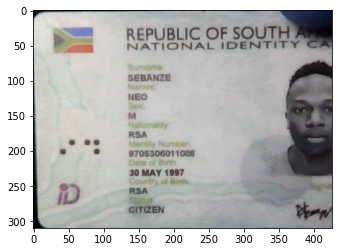

In [3]:
img = cv2.imread('me_id.jpg')
plt.imshow(crop_id(img))

#importing libraries 
